<a href="https://colab.research.google.com/github/kranjeet-da/ml/blob/main/TitanicMissingValue%26CategoricalMissingVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_excel("/content/titanic.xls")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## This type of null values are missing comletely at random(MCAR)

> 



In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing data not at random(MNAR)
#System missing values

In [ ]:
# Here I am giving null value to '1' and not null values '0' 
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1,0)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
# Finding the percentage of null values
df['Cabin_null'].mean()*100

77.10437710437711

In [ ]:
# Here I am finding the percentage of survive and not survive on the basis of cabine
df.groupby(['Survived'])['Cabin_null'].mean()*100

Survived
0    87.613843
1    60.233918
Name: Cabin_null, dtype: float64

# Missing At Random(MAR)

1.   Mean/Median/Mode replecement
2.   Random Sample Imputation
3.   Computing NAN values with a new feature
4.   End of Distribution Imputation
5.   Arbirary imputation
6.   Frequent Categories imputation



# 1 Mean/Median/Mode replecement

In [ ]:
df = pd.read_excel("/content/titanic.xls", usecols = ['Age', 'Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df, variable, median):
  df[variable +'_median'] = df[variable].fillna(median)


In [ ]:
median = df['Age'].median()
impute_nan(df, 'Age', median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

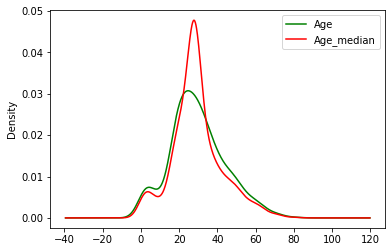

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = "kde", ax = ax, color='green')
df.Age_median.plot(kind = "kde", ax = ax , color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc = 'best')

Advantages and Disadvantages of Mean/Median imputation

**Adv-**
1. Easy to implement(Robust to Outliers)
2. Faster way to obtain the complete dataset
**Disadv-**
1. Change or Distortion in the original variance
2. Impacts correlation

# Random Sample Imputation

In [ ]:
df = pd.read_excel("/content/titanic.xls", usecols = ['Age', 'Fare','Survived'])

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0) 
# when are I not put randome_state =0 here then our value will change every time.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(df, variable, median):
  df[variable +'_median'] = df[variable].fillna(median)
  df[variable +'_random'] = df[variable]
  # It will have the random sample to fill the NA.
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),\
                                               random_state = 0)
  # Pandas need to have same index in order to merge the dataset
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample


In [ ]:
median = df.Age.median()
impute_nan(df, 'Age', median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


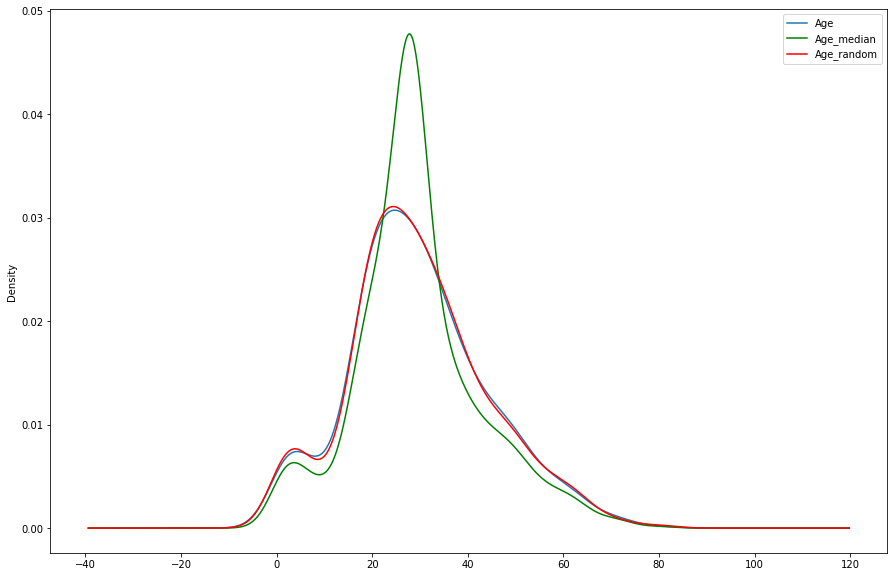

In [ ]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot (111)
df['Age'].plot(kind = "kde", ax = ax)
df.Age_median.plot(kind = "kde", ax = ax , color = 'green')
df.Age_random.plot(kind = "kde", ax = ax , color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

**Adv**
1. Easy to implementation
2. There is less distortion in variance
**Disadv**
1. Every situation randomness won't work


#Computing NAN values with a new feature

In [ ]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


In [ ]:
df['Age'].fillna(df.Age.median(), inplace = True) 
# for made change parmanentely

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


**Adv-**
1. Easy to implement
2. Computes the importance of missing values
**Disadv**
1. Creating additional features(curse of dimentionality)

# End of Distribution imputation

In [ ]:
df = pd.read_excel("/content/titanic.xls", usecols = ['Age', 'Fare','Survived'])


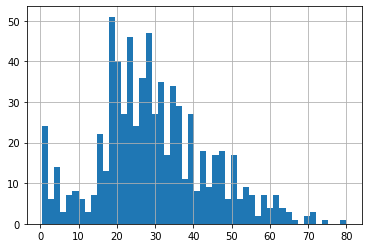

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extream = df.Age.mean()+3*df.Age.std()

In [ ]:
extream

73.27860964406095

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


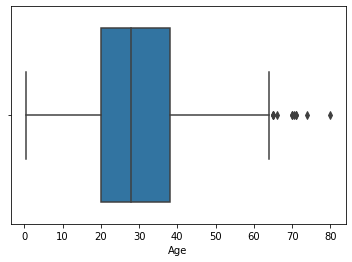

In [ ]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [ ]:
def impute_nan(df, variable, median, extream):
  df[variable +'_end_distribution'] = df[variable].fillna(extream)
  df[variable].fillna(median, inplace = True)

In [ ]:
df.Age.median()

28.0

In [ ]:
impute_nan(df,'Age', df.Age.median(), extream)

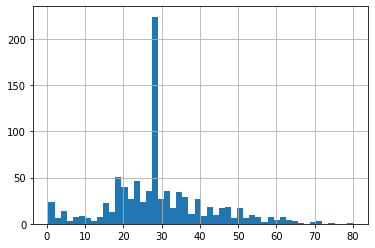

In [ ]:
df['Age'].hist(bins = 50)

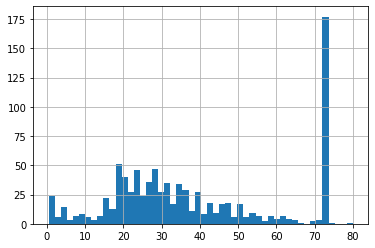

In [ ]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


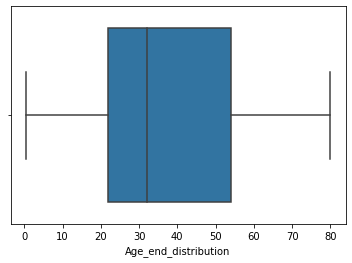

In [ ]:
sns.boxplot('Age_end_distribution', data = df)

**Adv**
1. Easy to implemrant
2. Captures the importance of missingness if there is one
**Disadv**
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mark the predictive power of the original variable by distorting its distributions
3. If the number of NA is big, it will mark true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and preprocessed in a subsequent of feature engineering.

#Arbitrary value imputation

In [ ]:
df = pd.read_excel("/content/titanic.xls", usecols = ['Age', 'Fare','Survived'])


In [ ]:
def impute_nan(df, variable):
  df[variable +'_Zero'] = df[variable].fillna(0)
  df[variable +'_Hundred'] = df[variable].fillna(100)
  

In [ ]:
impute_nan(df, 'Age')

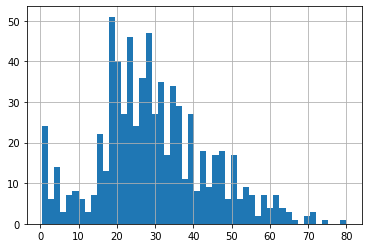

In [ ]:
df['Age'].hist(bins=50)

Arbitrary Value
1. It should be more frequently present

**Adv**
1. Easy to implement
2. Captures the importance of maissingness of there is one

**Disadv**
1. Distorts the original distribution of the variable.
2. If missingness is not important, it may mark the predictive power of the original variableby distroting it's distribution

**How to handle categorical missing variables**

1. Frequent categorical imputation